# Part II - Explanatory Analysis of Prosper Loan Data
## By: Morris Muchiri Mugo


## Investigation Overview

Starting with **Univariate Plots** from the bargraph of `prosper rating` I observed that prosper rating of `AA` which is the lowest risk score had the least amount of people with prosper rating of `C` having the highest. From the bargraph of `Listing Category` I observed that the category which had the highest amount was people who listed that the loan was for `Debt consolidation` with the least amount of people listing it was for `RV`. From the rest of the bargraph I observed that majority of the people taking the loan were `Employed`, their loan status was `Current` and they were Home owners. 

In the **Bivariate Plots** from the time series I observed that the `Borrower rate` has been increasing from 2009 till 2011 then it started to fall and the `monthly income` of people taking loans has been increasing over the years. I also observed that the majority of people who their `loan status` was either `current` or `completed` most were home owners and also their `Borrower rate` was lower than the rest. There was also a ngative correlation between the `Borrower rate` and `Monthly loan payment` and there was a positive correlation between `Debt to income ratio` and `Borrower rate`.

And finally in the **Multivariate Plots** from the `point plot` of `LoanStatus`, `MonthlyLoanPayment` and `Prosper Rating` we can see that those who had a Proser Rating of `A` and `AA` did not go past the FinalPaymentInProgress stage and most of them had high Monthly Loan Payments and those who had a Prosper Rating of `HR(which is the lowest rating)` had the lowest Monthly Loan Payments throughout all the Loan Status. And from the point plot of `LoanStatus`, `MonthlyLoanPayment` and `Employment Status` we can see that those who were Employed had the highest Monthly Loan Payments and those who were Retired or were part-time had the lowest Monthly Loan payments.


## Dataset Overview
This data set contains 75,233 loans with 22 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Cleaned_ProsperLoanData.csv')

## (Visualization 1)
The visualization shows the distribution of `Prosper Rating` of loans with **AA** having the least amount while **C** having the majority.

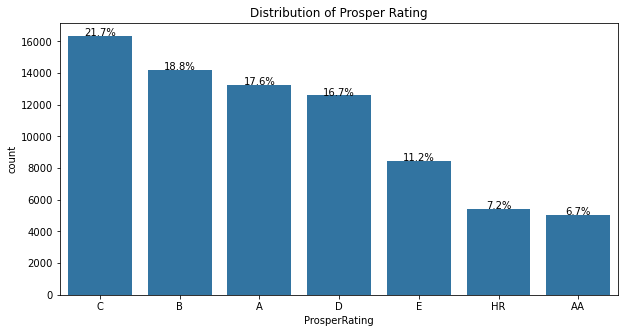

In [3]:
p_list = df['ProsperRating (Alpha)'].value_counts().sum()
prating_counts = df['ProsperRating (Alpha)'].value_counts()
prating_order = prating_counts.index

# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
sb.countplot(data=df, x='ProsperRating (Alpha)', color=base_color, order=prating_order);
plt.title('Distribution of Prosper Rating')
plt.xlabel('ProsperRating')

# Recalculating the type_counts just to have clarity.
pr_counts = df['ProsperRating (Alpha)'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = pr_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/p_list)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

## (Visualization 2)
The visualization shows the distribution of `List Category` of people who have taken loans with the majority being **1- for Debt Consolidation** while the least being **12- for RV**

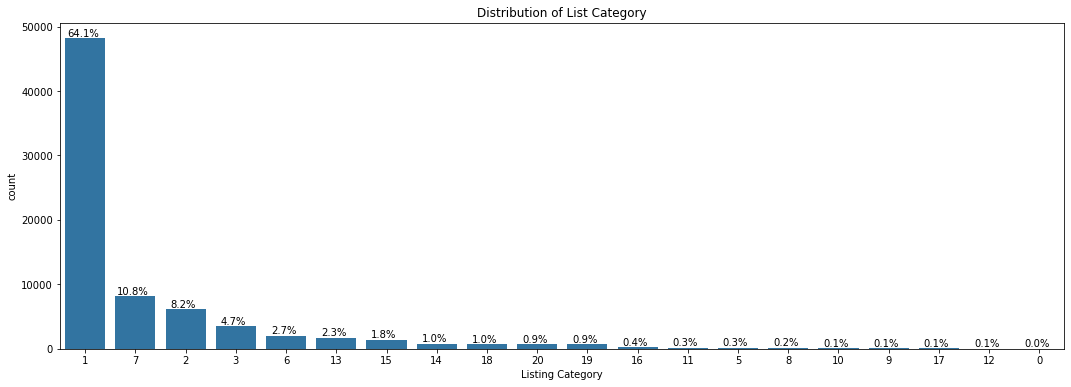

In [4]:
listing_counts = df['ListingCategory (numeric)'].value_counts()
listing_order = listing_counts.index

ticks = listing_order
labels = ['Debt consolidation','Other','Home Improvement','Business','Auto','House Hold expenses','Medical/Dental','Taxes','Large Purchases','Wedding loans','Vacation',
          'Mortocycle','Student use','Engagement ring','Baby&Adoption','Cosmetic procedure','Boat','Green loans','RV','Not Available']

plt.figure(figsize = [18, 6])
ax = sb.countplot(x="ListingCategory (numeric)", data=df, color=base_color, order=listing_order)

# This function is used to change the count plot numbers into percentages
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 10, va='bottom', ha='center')

without_hue(ax, df['ListingCategory (numeric)'])

plt.xticks(rotation=0)
plt.title('Distribution of List Category')
plt.xlabel('Listing Category');

## (Visualization 3)
The visualization shows the distribution of `Employment Status` of people who have taken loans with the majority being **Employed**

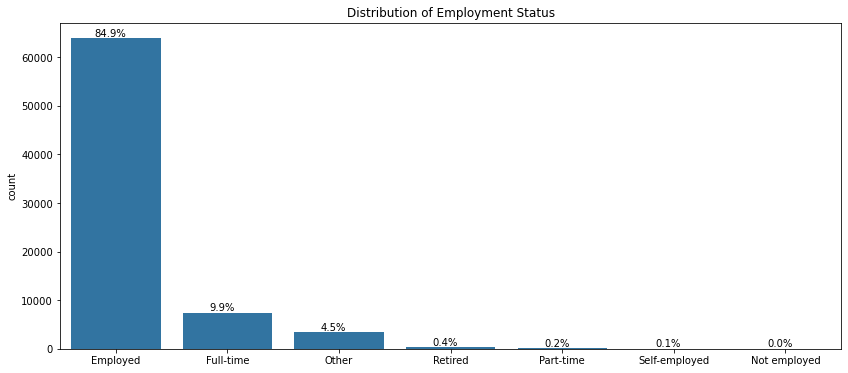

In [5]:
employ_counts = df['EmploymentStatus'].value_counts()
employ_order = employ_counts.index

plt.figure(figsize = [14, 6])
ax = sb.countplot(data=df, x="EmploymentStatus", color=base_color, order=employ_order)

without_hue(ax, df['EmploymentStatus'])
plt.title('Distribution of Employment Status')
plt.xlabel('');

## (Visualization 4)
The visualization shows the distribution of `Loan Status` of people who have taken loans with the majority having **Current** followed by **Completed**

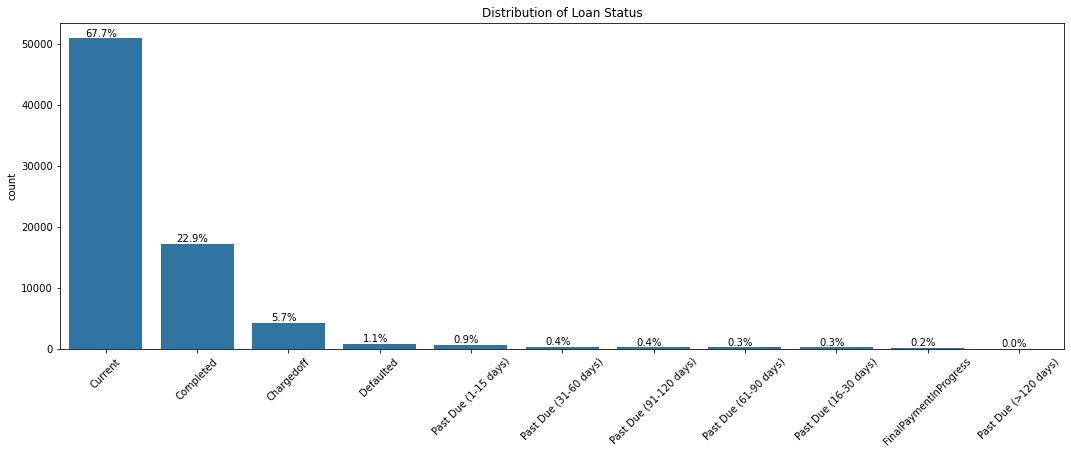

In [6]:
loan_counts = df['LoanStatus'].value_counts()
loan_order = loan_counts.index

plt.figure(figsize = [18, 6])
ax = sb.countplot(data=df, x="LoanStatus", color=base_color, order=loan_order)

without_hue(ax, df['LoanStatus'])
plt.xticks(rotation=45)
plt.title('Distribution of Loan Status')
plt.xlabel('');

## (Visualization 5)
The visualization shows the distribution of `Stated Monthly Income` of people who have taken loans with the highest Income being **between 4,000 and 6,000**

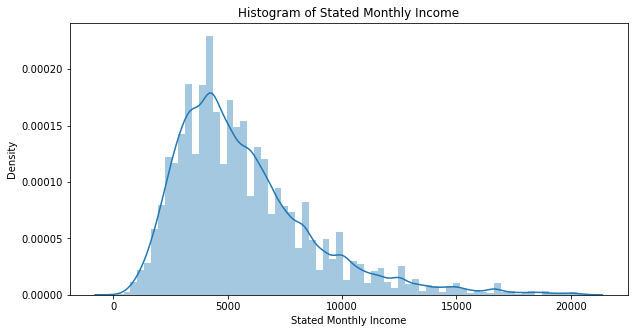

In [7]:
plt.figure(figsize = [10, 5])
bins = np.arange(150, df['StatedMonthlyIncome'].max()+1000, 300)
sb.distplot(df['StatedMonthlyIncome'], bins = bins)
plt.title('Histogram of Stated Monthly Income')
plt.xlabel('Stated Monthly Income');

## (Visualization 6)
The visualization shows the time series of `Borrower Rate` based on the Loan Start date and we can see that the Borrower Rate has been increasing from the year **2009** till **2011** when it started to fall

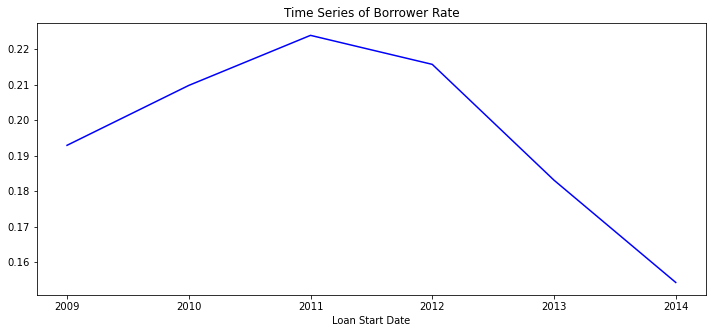

In [8]:
def timeseries (a,b,c,d,e,f):
    df.groupby(a)[b].mean().plot(kind = c, figsize = (12,5), c = d, title = e)
    plt.xlabel(f)
    return timeseries

timeseries ('Loan_Start_Date','BorrowerRate','line','blue','Time Series of Borrower Rate','Loan Start Date');

## (Visualization 7)
The visualization shows the time series of `Stated Monthly Income` based on the Loan Start date and we can see that the Stated Monthly Income has been increasing over the years.

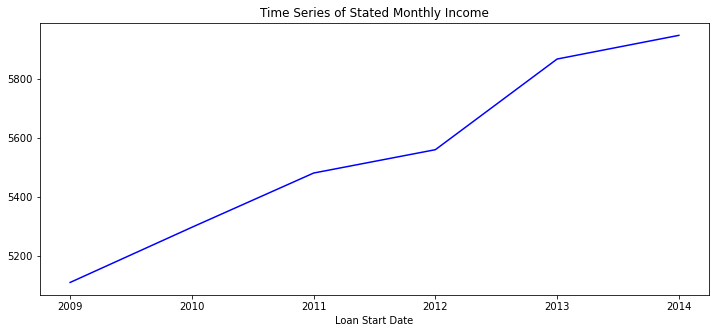

In [9]:
timeseries ('Loan_Start_Date','StatedMonthlyIncome','line','blue','Time Series of Stated Monthly Income','Loan Start Date');

## (Visualization 8)
The visualization shows the relationship between `Loan outcome status` and `Home Owner` and we can see that in categories of both people who had loan status of **Current** and **Completed** majority were Home Owners.

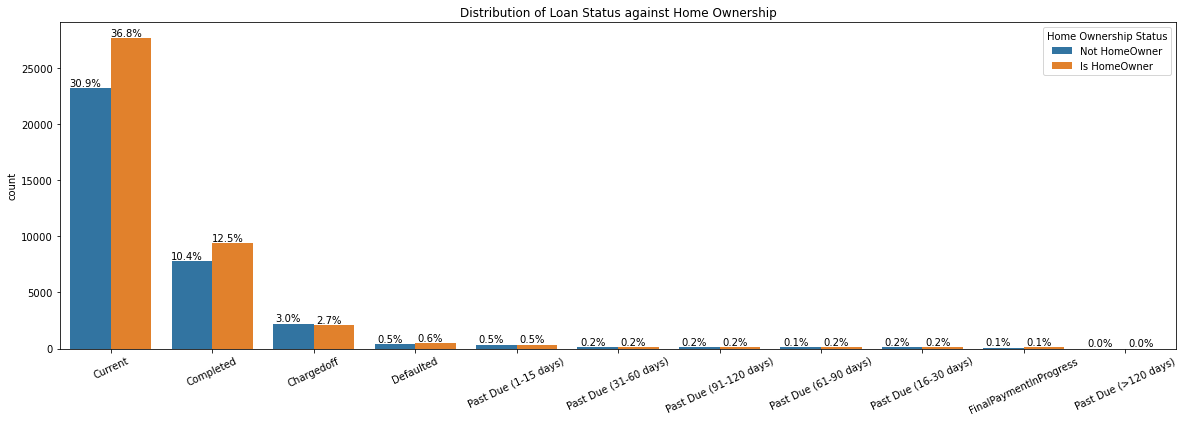

In [10]:
plt.figure(figsize = [20, 6])
legend_labels = ['Not HomeOwner', 'Is HomeOwner']

ax = sb.countplot(data = df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', order=loan_order)
without_hue(ax, df['LoanStatus'])

plt.legend(labels = legend_labels, title = 'Home Ownership Status')
plt.xticks(rotation=25)
plt.title('Distribution of Loan Status against Home Ownership')
plt.xlabel('');

## (Visualization 9)
The visualization shows the relationship between `Loan outcome status` and `Borower Rate` and we can see that in categories of both people who had loan status of **Current** and **Completed** had lower Borrower Rate compared to the rest.

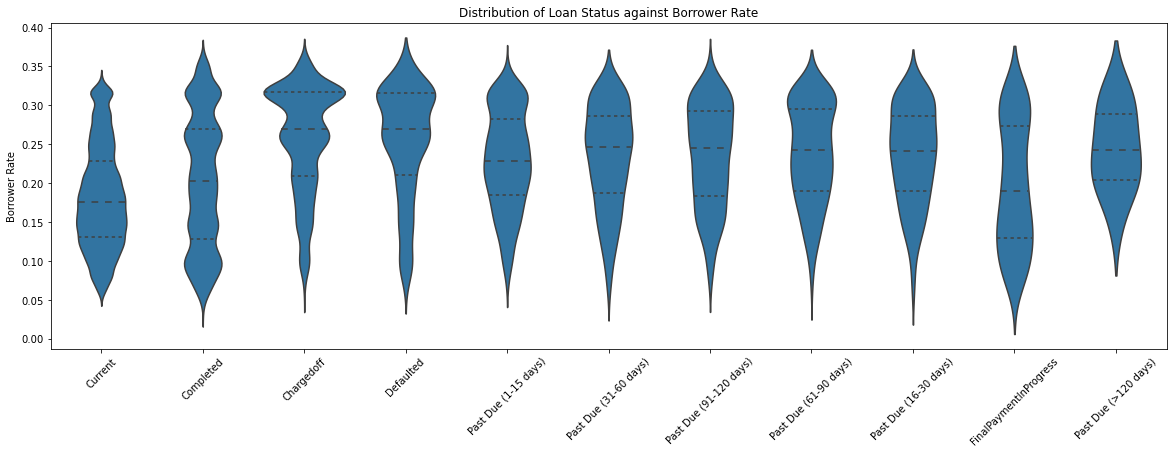

In [11]:
# check the relationship between loan outcome status and Borrower Rate
plt.figure(figsize = [20, 6])
sb.violinplot(data=df, x='LoanStatus', y='BorrowerRate', color=base_color, inner='quartile',order=loan_order)
plt.xticks(rotation=45)
plt.title('Distribution of Loan Status against Borrower Rate')
plt.ylabel('Borrower Rate')
plt.xlabel('');

## (Visualization 10)
The visualization shows a **Heatmap** of `Borrower Rate` against `Monthly Income` and we can see there is a **negative correlation** between the two variables.

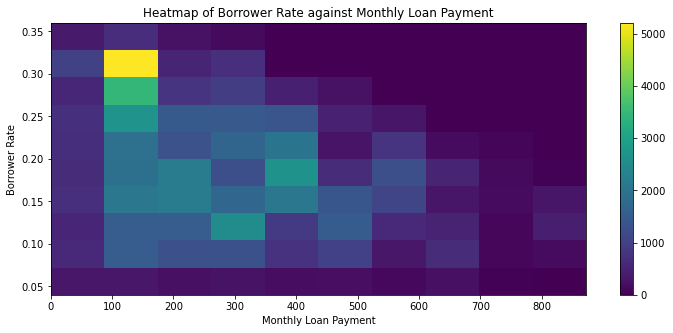

In [12]:
def histo(x,y):
    plt.figure(figsize = [12, 5])
    plt.hist2d(data = df, x = x, y = y)
    plt.colorbar();
# check the relationship between Borrower rate and MonthlyLoanPayment

histo('MonthlyLoanPayment','BorrowerRate') 
plt.title('Heatmap of Borrower Rate against Monthly Loan Payment')
plt.ylabel('Borrower Rate')
plt.xlabel('Monthly Loan Payment');

## (Visualization 11)
The visualization shows a **Heatmap** of `Borrower Rate` against `Debt to Income Ratio` and we can see there is a **Positive correlation** between the two variables.

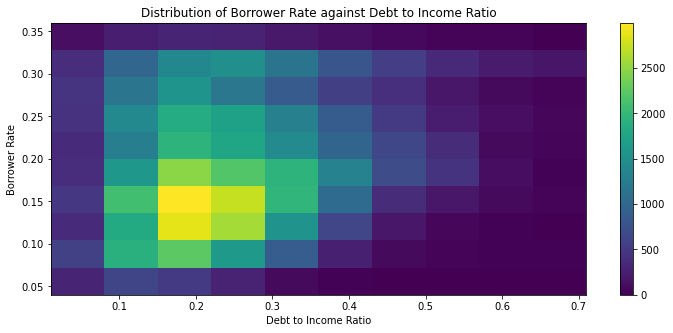

In [13]:
# check the relationship between Borrower rate and DebtToIncomeRatio

histo('DebtToIncomeRatio','BorrowerRate')
plt.title('Distribution of Borrower Rate against Debt to Income Ratio')
plt.ylabel('Borrower Rate')
plt.xlabel('Debt to Income Ratio');

## (Visualization 12)
The visualization shows a point plot showing the relationship between `loan outcome status`, `the monthly loan payment` and `prosper rating` and we can see that those who had a Proser Rating of **A** and **AA** did not go past the Final Payment In Progress stage and most of them had high Monthly Loan Payments and those who had a Prosper Rating of **HR(which is the lowest rating)** had the lowest Monthly Loan Payments throughout all the Loan Status

<function __main__.multi_plot(a, b, c, d, e, f)>

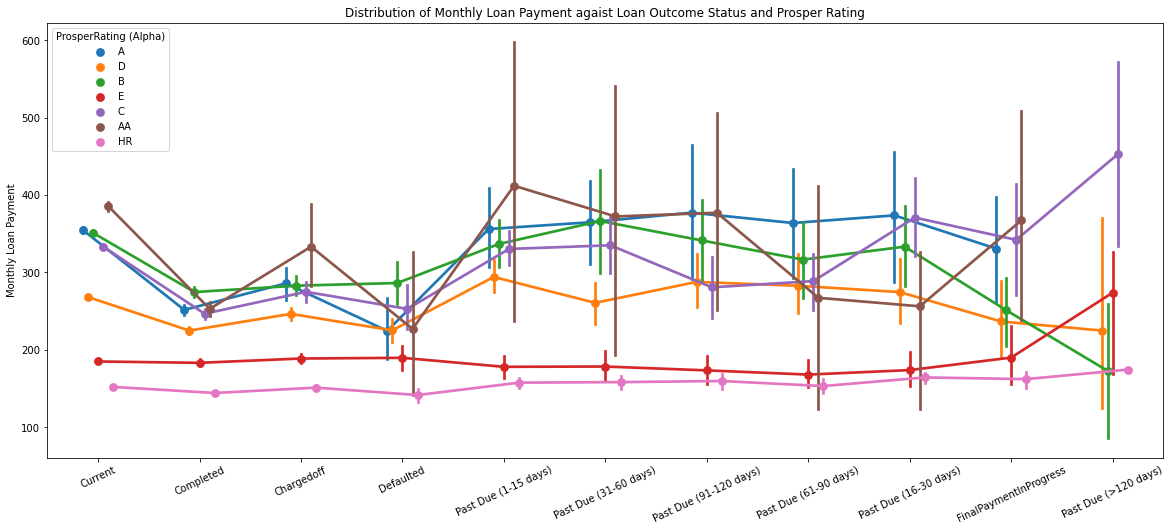

In [14]:
def multi_plot(a,b,c,d,e,f):
    plt.figure(figsize = [20, 8])
    ax = sb.pointplot(data = df, x = a, y = b, hue = c, order=loan_order, dodge = 0.3)
    plt.xticks(rotation=25)
    plt.title(d)
    plt.ylabel(e)
    plt.xlabel(f)
    return multi_plot

multi_plot('LoanStatus','MonthlyLoanPayment','ProsperRating (Alpha)','Distribution of Monthly Loan Payment agaist Loan Outcome Status and Prosper Rating',
           'Monthly Loan Payment','')

## (Visualization 13)
The visualization shows a point plot showing the relationship between `loan outcome status`, `the monthly loan payment` and `Employment Status` and we can see that those who were **Employed** had the highest Monthly Loan Payments and those who were **Retired** or were **part-time** had the lowest Monthly Loan payments.

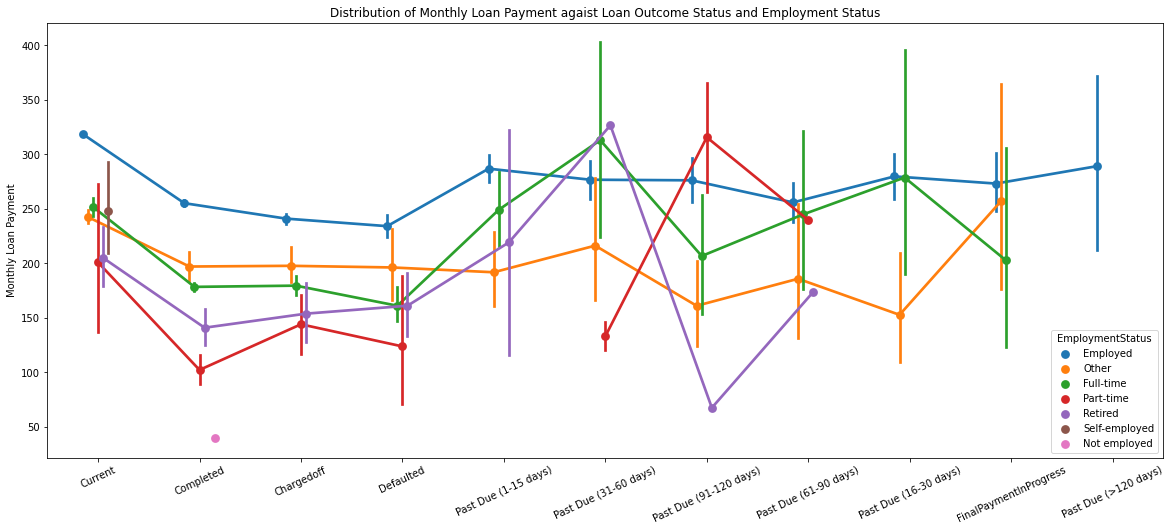

In [18]:
multi_plot('LoanStatus','MonthlyLoanPayment','EmploymentStatus','Distribution of Monthly Loan Payment agaist Loan Outcome Status and Employment Status',
           'Monthly Loan Payment','');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [16]:
#!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 